# ChainLink Price Prediction 2021

## 1. Data Preparation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

In [6]:
df = pd.read_csv('data/coin_Cardano.csv')

In [7]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [8]:
df.shape

(1245, 10)

In [9]:
#spliting 'Date' column to 'date' and 'time'
df['Date'] = pd.to_datetime(df['Date'])
df['date'] = df['Date'].dt.date
df['time'] = df['Date'].dt.time

#drop non-relevant columns
df.drop(['SNo','Name','Symbol','Date','time'], axis=1, inplace=True)

In [10]:
#set date as new index
df.set_index('date',inplace=True)

In [11]:
df

,High,Low,Open,Close,Volume,Marketcap
date,,,,,,
2017-10-02,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
2017-10-03,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2017-10-04,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
2017-10-05,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
2017-10-06,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...
2021-02-23,1.133705,0.824145,1.098769,0.954709,1.120190e+10,2.970337e+10
2021-02-24,1.074832,0.902583,0.954958,1.051657,8.481335e+09,3.271965e+10
2021-02-25,1.172732,1.017986,1.051349,1.079116,8.248286e+09,3.357399e+10


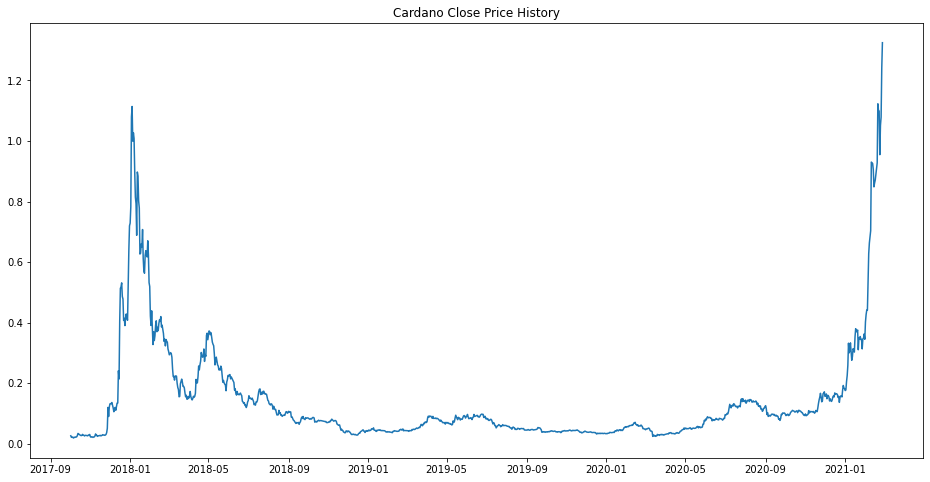

In [12]:
plt.figure(figsize=(16,8))
plt.title('Cardano Close Price History')
plt.plot(df['Close'])

## 2.Data Preprocessing

In [9]:
#Create a new dataframe with only close column
data = df.filter(['Close'])
#convert to a numpy array
dataset = data.values

#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1005

### 2.1 Data Normalization

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)

dataset

array([[ 0.16968   ],
       [ 0.15050299],
       [ 0.131129  ],
       ...,
       [24.66804707],
       [25.18731328],
       [26.23509742]])

In [11]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

In [12]:
#convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(945, 60, 1)

In [68]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False, dropout=0.5, recurrent_dropout=0.4))
model.add(Dense(1))
model.add(Activation('linear'))

In [69]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
#train the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
30/30 [==============================] - 5s 37ms/step - loss: 0.0012
Epoch 2/100
30/30 [==============================] - 1s 37ms/step - loss: 1.3904e-04
Epoch 3/100
30/30 [==============================] - 1s 37ms/step - loss: 9.6670e-05
Epoch 4/100
30/30 [==============================] - 1s 37ms/step - loss: 8.7215e-05
Epoch 5/100
30/30 [==============================] - 1s 37ms/step - loss: 7.1920e-05
Epoch 6/100
30/30 [==============================] - 1s 37ms/step - loss: 8.7791e-05
Epoch 7/100
30/30 [==============================] - 1s 37ms/step - loss: 6.7667e-05
Epoch 8/100
30/30 [==============================] - 1s 39ms/step - loss: 7.4011e-05
Epoch 9/100
30/30 [==============================] - 1s 37ms/step - loss: 6.7144e-05
Epoch 10/100
30/30 [==============================] - 1s 37ms/step - loss: 5.9186e-05
Epoch 11/100
30/30 [==============================] - 1s 37ms/step - loss: 7.9178e-05
Epoch 12/100
30/30 [==============================] - 1s 40ms/step 

In [71]:
#create the testing dataset
#create a new array containing scaled values from the test
test_data = scaled_data[training_data_len - 60: , :]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [72]:
#convert the data to numpy array
x_test = np.array(x_test)

In [73]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [74]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [75]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

2.1760884086226735

<ipython-input-76-2558656118bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


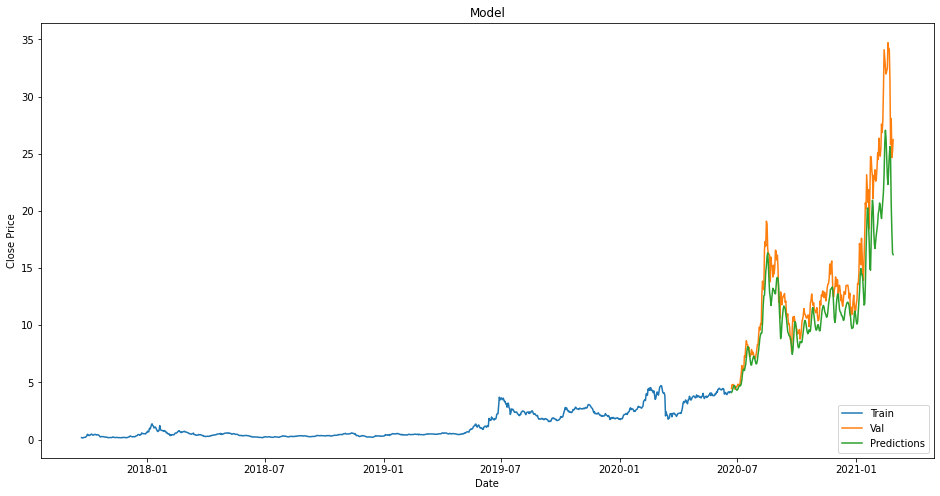

In [76]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [77]:
#show the valid and predicted prices
valid

,Close,Predictions
date,,
2020-06-22,4.467934,4.114925
2020-06-23,4.806252,4.201776
2020-06-24,4.719017,4.425611
2020-06-25,4.814206,4.604281
2020-06-26,4.680805,4.721280
...,...,...
2021-02-23,25.800343,24.536186
2021-02-24,28.086719,20.546278
2021-02-25,24.668047,18.205727


In [80]:
LINK_quote = web.DataReader('LINK-USD', data_source='yahoo', start='2017-09-21', end='2021-03-10')
#create a new dataframe
new_df = LINK_quote.filter(['Close'])
#Get the last 60 day closing price
last_60_days = new_df[-60:].values
#scale the data
last_60_days_scale = scaler.transform(last_60_days)
#create an empty list
X_test = []
X_test.append(last_60_days_scale)
#convert the x_test to np.array
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test, ((X_test.shape[0], X_test.shape[1], 1)))
#get predicted price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[23.55863]]


In [79]:
LINK_quote2 = web.DataReader('LINK-USD', data_source='yahoo', start='2021-03-11', end='2021-03-11')
print(LINK_quote2)

                High        Low       Open      Close      Volume  Adj Close
Date                                                                        
2021-03-10  31.74357  29.516371  31.494772  29.946716  1606531493  29.946716
2021-03-11  30.37233  28.725658  29.908989  30.075174  1537882621  30.075174
